In [1]:
import pandas as pd
file_name="/home/khaldi/Downloads/classic3.csv"
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
df=pd.read_csv(file_name)
df=df.drop(["Unnamed: 0"],axis=1)

In [3]:
df

,text,label
0,Milestones in Cataloging In the case of the pr...,cisi
1,childhood psychosis. a description is given of...,med
2,neonatal hepatitis or familial neonatal obstru...,med
3,Handbook of Comparative Librarianship The firs...,cisi
4,Design and Evaluation of Information Systems T...,cisi
...,...,...
3886,modification of autistic behavior with lsd-25....,med
3887,Patterns of Evaluation in Science: Institution...,cisi
3888,The government of the American Public Library ...,cisi
3889,base pressure at subsonic speeds in the presen...,cran


In [4]:
from src.core.processing.Processing import Processing
p=Processing()

[nltk_data] Downloading package stopwords to /home/khaldi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
df["tokens"]=df["text"].apply(lambda text:p.pipeline(text))

In [6]:
df["text_tokenized"]=df["tokens"].apply(lambda tokens: " ".join(tokens))

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
c=CountVectorizer()
X=c.fit_transform(df["text_tokenized"]).toarray()

In [8]:
from src.core.embedding.ModelForEmbedding import ModelForEmbedding
m=ModelForEmbedding(list(df["text_tokenized"]))

In [9]:
embeddings_w2vec_dict=m.word_embeddings(method="Word2Vec")

In [10]:
vocab_w2vec=list(embeddings_w2vec_dict.keys())

In [11]:
import numpy as np
embeddings_w2vec=np.array(list(embeddings_w2vec_dict.values()))

In [12]:
def verify_word(sentence,vocab):
    tokens=sentence.split()
    tmp=[word for word in tokens if word in vocab]
    return len(tmp)==len(tokens)

In [13]:
def transform_sentence(sentence,vocab):
    return " ".join([word if word in vocab else "" for word in sentence.split()])

In [14]:
from src.core.embedding.SentenceEmbedding import SentencesEmbedding
mapping_w2vec=dict(zip(vocab_w2vec,range(len(vocab_w2vec))))
sentences_with_vocab=[transform_sentence(sentence,vocab_w2vec) for sentence in m.sentences]
sentences_emb_w2vec=SentencesEmbedding(embeddings_w2vec,mapping_w2vec)

In [15]:
sentences_embeddings_w2vec=sentences_emb_w2vec.create_sentences_embedding(sentences_with_vocab)

In [16]:
from sklearn.decomposition import PCA
pca=PCA()
X_w2vec=pca.fit_transform(sentences_embeddings_w2vec)

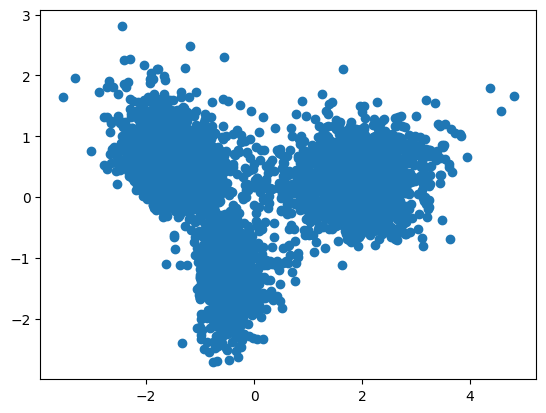

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_w2vec[:,0].reshape(-1),X_w2vec[:,1].reshape(-1))

In [18]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2)
X_w2vec_tsne=tsne.fit_transform(sentences_embeddings_w2vec)

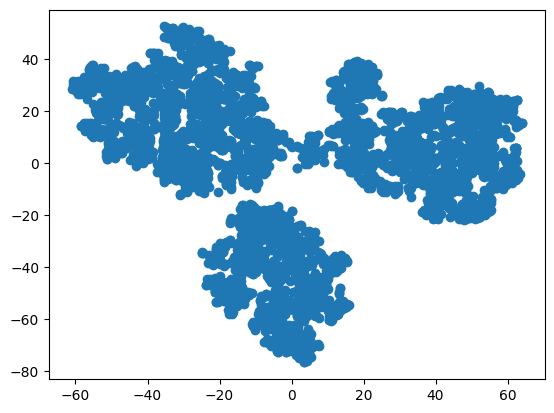

In [19]:
plt.scatter(X_w2vec_tsne[:,0].reshape(-1),X_w2vec_tsne[:,1].reshape(-1))

In [20]:
embeddings_glove_dict=m.word_embeddings(method="Glove",file_out="/home/khaldi/modeles_word2vec/glove.42B.300d_glove.txt")

In [21]:
vocab_glove=list(embeddings_glove_dict.keys())

In [22]:
embeddings_glove=np.array([embeddings_glove_dict[w] for w in vocab_glove if w in embeddings_glove_dict.keys()])

In [23]:
mapping_glove=dict(zip(vocab_glove,range(len(vocab_glove))))

In [24]:
sentences_with_vocab=[transform_sentence(sentence,vocab_glove) for sentence in m.sentences]
sentences_emb_glv=SentencesEmbedding(embeddings_glove,mapping_glove)

In [25]:
sentences_embeddings_glv=sentences_emb_glv.create_sentences_embedding(sentences_with_vocab)

In [26]:
sentences_embeddings_glv

array([[ 0.08812288, -0.04243887, -0.05590761, ...,  0.09859505,
        -0.12717853,  0.10292543],
       [ 0.07670154, -0.13417053, -0.04603984, ...,  0.21928883,
        -0.01605481, -0.05466244],
       [ 0.10557759,  0.04956921, -0.09428295, ...,  0.03649627,
        -0.0271471 ,  0.06298743],
       ...,
       [ 0.07696796, -0.13165452,  0.03458796, ...,  0.02593411,
        -0.005466  ,  0.06293992],
       [-0.1482594 ,  0.02461913, -0.10249338, ..., -0.08083253,
        -0.13401371, -0.06336385],
       [-0.06946538,  0.06071386, -0.05023254, ..., -0.14826205,
         0.03178973,  0.05266881]])

In [27]:
from sklearn.decomposition import PCA
pca=PCA()
X_glv_pca=pca.fit_transform(sentences_embeddings_glv)

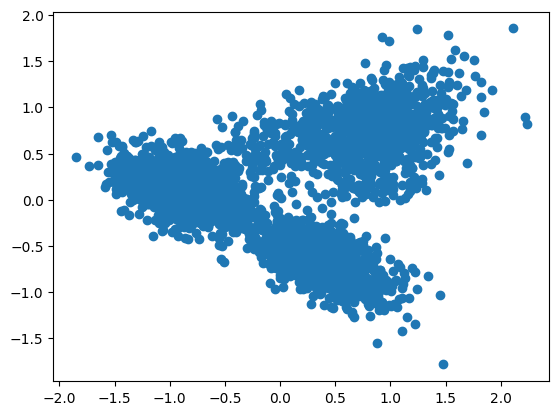

In [28]:
plt.scatter(X_glv_pca[:,0].reshape(-1),X_glv_pca[:,1].reshape(-1))

In [29]:
tsne=TSNE(n_components=2)
X_glv_tsne=tsne.fit_transform(sentences_embeddings_glv)

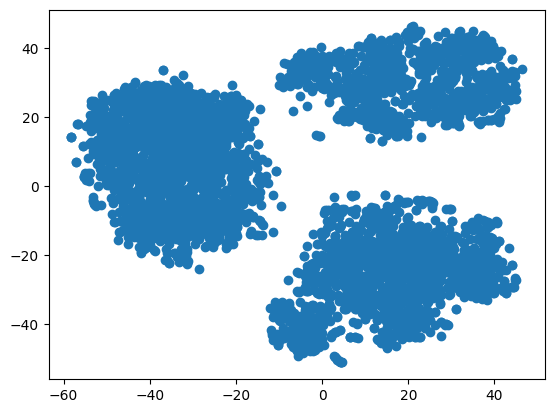

In [30]:
plt.scatter(X_glv_tsne[:,0].reshape(-1),X_glv_tsne[:,1].reshape(-1))

In [31]:
from src.core.reduction.ReductionEmbedding import ReductionEmbedding
rd=ReductionEmbedding(embeddings_glove)

In [41]:
from src.core.globals import DEFAULT_PARAMS
rd.create_reduced_matrix(params=DEFAULT_PARAMS["AE"],method="AE")

array([[1.4010158 , 0.9176669 , 0.9829472 ],
       [1.8176174 , 1.126219  , 1.579557  ],
       [1.2237568 , 1.1887586 , 1.0758384 ],
       ...,
       [2.9879327 , 2.1645598 , 3.06693   ],
       [0.37051493, 1.4064018 , 0.        ],
       [0.81159705, 0.88015586, 0.7868543 ]], dtype=float32)